In [9]:
#- Python version 3.8.10 is recommended


#The following template is provided as a guideline only. You can modify it as you need.

#introduce something here " = ""

# -libraries
import numpy
import sklearn
import sklearn.datasets
import sklearn.model_selection
import sklearn.decomposition
import warnings
warnings.filterwarnings('ignore')


##- visualization
import matplotlib.pyplot as plt


In [10]:
# #- loading data
digits = sklearn.datasets.load_digits()
X = digits.data
Y = digits.target

# Data analysis

In [11]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## Digit Visualization Example

Target value:  5
Digit array:  [[ 0.  2. 16. 16. 16. 16.  4.  0.]
 [ 0.  4. 16.  6.  8.  7.  1.  0.]
 [ 0.  4. 16.  7.  2.  0.  0.  0.]
 [ 0.  4. 16. 16. 16.  6.  0.  0.]
 [ 0.  0.  5.  4. 10. 15.  0.  0.]
 [ 0.  0.  0.  0.  1. 14.  6.  0.]
 [ 0.  2. 14.  4.  4. 16.  8.  0.]
 [ 0.  3. 13. 16. 16. 15.  1.  0.]]


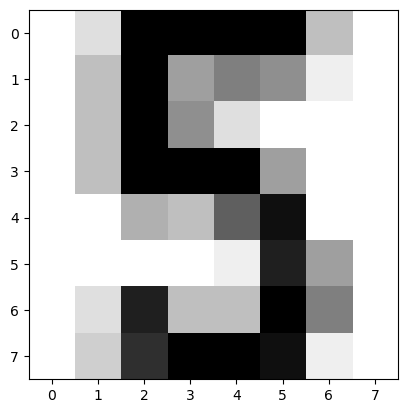

In [12]:
print("Target value: ", digits.target[1021])
print("Digit array: ", digits.images[1021])
plt.imshow(digits.images[1021], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### Digit Metadata

In [13]:
print(digits.images.shape)
print(digits.data.shape)
print(digits.target)

(1797, 8, 8)
(1797, 64)
[0 1 2 ... 8 9 8]


# Data Analysis

## Data Split

In [14]:
##- split the data 75% train and 25% test subsets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=42, stratify=Y)


In [15]:
print("(Num images, Image size)")
print(x_train.shape)
print(x_test.shape)
print("(Predicted number)")
print(y_train.shape)
print(y_test.shape)


(Num images, Image size)
(1347, 64)
(450, 64)
(Predicted number)
(1347,)
(450,)


## Data Normalizationby zero mean and unit variance

In [16]:
##- Data normalization by zero mean and unit variance
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)

In [17]:
print("Showing that scaled data has zero mean and unit variance:")
print("Mean")
print(x_train_scaled.mean(axis=0))
print("Variance")
print(x_train_scaled.std(axis=0))

Showing that scaled data has zero mean and unit variance:
Mean
[ 0.00000000e+00 -8.43176061e-17  8.16801052e-17 -2.03252411e-16
  1.10816248e-16  2.53859459e-17 -1.68882478e-16  1.51058742e-16
  1.05293980e-17  2.08527413e-16  1.89735219e-16  7.28609617e-17
 -2.12153977e-16 -4.12521621e-17  3.24742295e-16  3.82643682e-16
  1.32019282e-16  2.95400098e-16 -2.90125096e-17 -1.36820358e-16
 -3.68129700e-17  2.30781327e-17 -7.47566654e-17  2.26701442e-16
 -3.00968728e-16  2.91155370e-17  6.05800982e-17 -4.45078273e-17
  6.92343980e-17 -6.98937732e-17 -2.15615697e-16  1.55664065e-16
  0.00000000e+00 -2.96224317e-16 -6.69265847e-17  1.70943025e-16
 -1.63195367e-16 -1.91878189e-16 -3.51117304e-17  0.00000000e+00
  3.10565728e-16  1.70448494e-16 -5.52226746e-17 -8.72023727e-17
  3.84086065e-17  5.82722850e-17 -1.25610979e-16 -1.43764403e-16
 -1.55694974e-16 -3.36281362e-17  4.82168129e-17  1.47535205e-17
 -1.52315676e-16  5.15136890e-18  3.29028234e-16  3.29069445e-16
 -3.40309732e-16  1.6187661

In [18]:
# apply scaling on testing data having into account x_train statistics
x_test_scaled = scaler.transform (x_test)


# PCA Analysis

In [19]:
##- Dimensionality reduction: PCA and SVD analysis
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

##- PCA Analysis
pca = PCA(n_components=0.95)
pca.fit(x_train_scaled)
size = numpy.arange(10, pca.explained_variance_ratio_.shape[0])

print("Variance: ", pca.explained_variance_ratio_[0:5])
print("Variance ratio: ",pca.explained_variance_[0:5])
print("Singular Values: ", pca.singular_values_[0:5]) 



Variance:  [0.11918083 0.09668681 0.083441   0.06702611 0.04851085]
Variance ratio:  [7.27543205 5.90227709 5.09368231 4.09163026 2.96136043]
Singular Values:  [98.95823125 89.13172817 82.80154825 74.21141643 63.13470628]


Num components needed for a 0.9025496322838922 % accuracy:  31


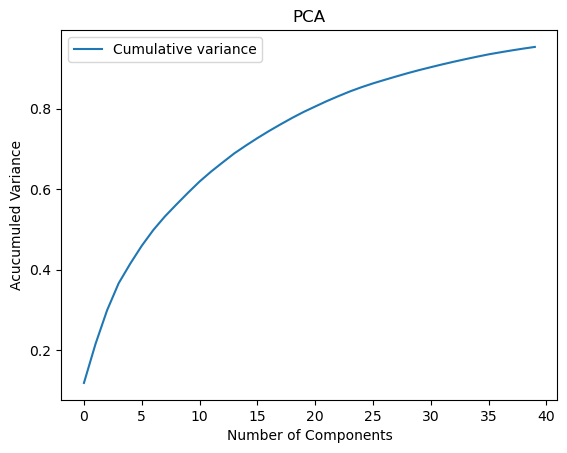

In [20]:
num_components_needed = 0
found = 0
curr_total_variance = 0
cumulative_variance = numpy.empty(pca.explained_variance_ratio_.shape[0])
last_accumulated_variance = 0 
# Computing cumulative variance
for i in range(0,pca.explained_variance_ratio_.shape[0]):
    cumulative_variance[i] = curr_total_variance + pca.explained_variance_ratio_[i]
    curr_total_variance += pca.explained_variance_ratio_[i]
    if curr_total_variance > 0.9 and found == 0:
        num_components_needed = i + 1
        found = 1
        last_accumulated_variance = curr_total_variance
        
print("Num components needed for a", last_accumulated_variance, "% accuracy: ", num_components_needed)  
##- the PCA explains a part of the variance. Plot the cumulative variance to get the number of principal
## components we need.
plt.title('PCA')
plt.xlabel('Number of Components')
plt.ylabel('Acucumuled Variance')
plt.plot( cumulative_variance, label = 'Cumulative variance')
plt.legend()
plt.show()

# SVD Analysis

In [21]:
##- SVD Analysis
tsvd = TruncatedSVD(n_components=(num_components_needed)).fit(x_train_scaled)
## - Same analysis as PCA: you have to obtain the best number of components for SVD.
print("Variance: ", tsvd.explained_variance_ratio_[0:5])
print("Singular Values: ", tsvd.singular_values_[0:5])
print("Accumuled variance in % for", num_components_needed," components is: ", tsvd.explained_variance_ratio_.sum()) 



Variance:  [0.11918083 0.09668681 0.083441   0.06702611 0.04851085]
Singular Values:  [98.95823125 89.13172817 82.80154825 74.21141643 63.13470628]
Accumuled variance in % for 31  components is:  0.902544165385209


In [22]:
## Apply a dimension reduction choosing a 95% of variance explained (x_pca_train, x_tsvd_train, x_pca_test...)
"" # TODO: aplicar dimension reduction no se si lo que esta en PCA analysis (pca = PCA(n_components=0.95)) es suficiente

''

# KNN Classifier

## Find Optimal K

In [23]:
##- Find the k optimal value for the k-NN classifier using 10-fold cross-validation
## TODO encontrar la K optima con el kfold (aunque despues el profe pide el estudio con diferentes k que ya lo he hecho)
# TODO: creo que este link es util pero idk
"" 
##- create the knn classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# from sklearn import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3) # TODO: Poner la k optima en lugar de 3

In [24]:
##- learn the digits on the train subset
clf.fit(x_train_scaled, y_train) # you should also use preprocessed x data

##- predict the value of the digit on the test subset
predicted = clf.predict(x_test_scaled)

In [25]:
##- print the metrics
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predicted)) #  TODO: Ver que sin la k optima la accuracy es una mierda



Accuracy: 0.9666666666666667


## Different k analysis Not Preprocessed KNN

In [26]:
##- k neighbours analysis: different clsssifier performances varyng the number of k

# Setup arrays to store train and test accuracies
neighbors = numpy.arange(1, 20)
train_accuracy = numpy.empty(len(neighbors))
test_accuracy = numpy.empty(len(neighbors))
cross_fold_accuracy = numpy.empty(len(neighbors))
deviation = numpy.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(x_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)
    cv_scores = cross_val_score(knn, x_train, y_train, cv=10)
    cross_fold_accuracy[i] = numpy.mean(cv_scores)
    deviation[i] = cv_scores.std()

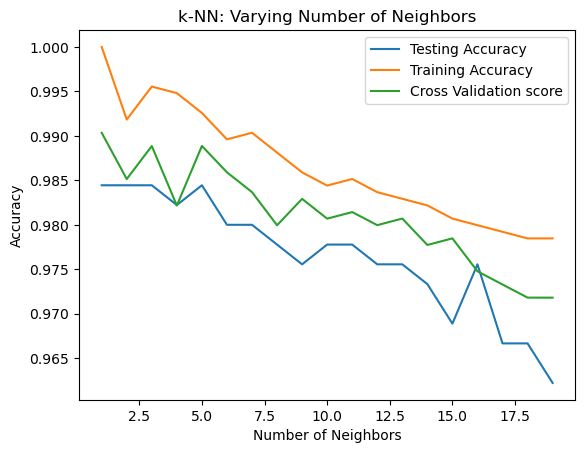

In [27]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.plot(neighbors, cross_fold_accuracy, label = 'Cross Validation score')

plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

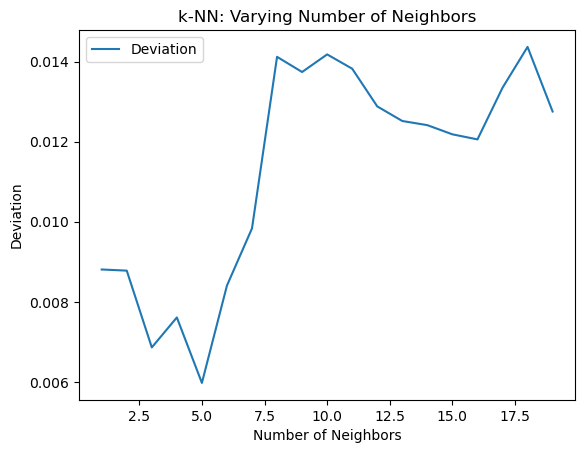

In [28]:
plt.title('k-NN: Varying Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Deviation')
plt.plot(neighbors, deviation, label = 'Deviation')
plt.legend()
plt.show()

## Different k analysis Preprocessed KNN


In [29]:
# Setup arrays to store train and test accuracies
neighbors = numpy.arange(1, 15)
train_accuracy = numpy.empty(len(neighbors))
test_accuracy = numpy.empty(len(neighbors))
cross_fold_accuracy = numpy.empty(len(neighbors))
deviation = numpy.empty(len(neighbors))


# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(x_train_scaled, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train_scaled, y_train)
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test_scaled, y_test)
    cv_scores = cross_val_score(knn, x_train_scaled, y_train, cv=10)
    cross_fold_accuracy[i] = numpy.mean(cv_scores)
    deviation[i] = cv_scores.std()

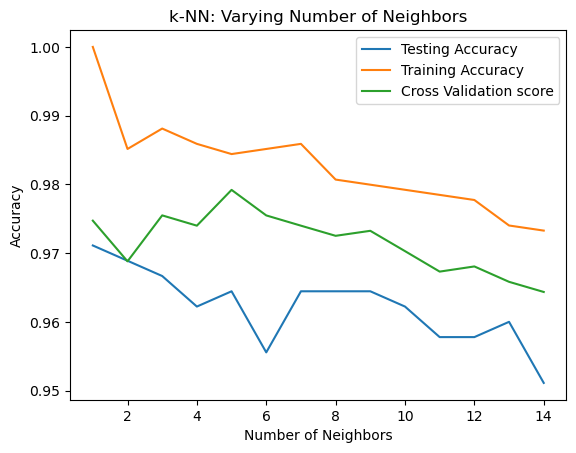

In [30]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.plot(neighbors, cross_fold_accuracy, label = 'Cross Validation score')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


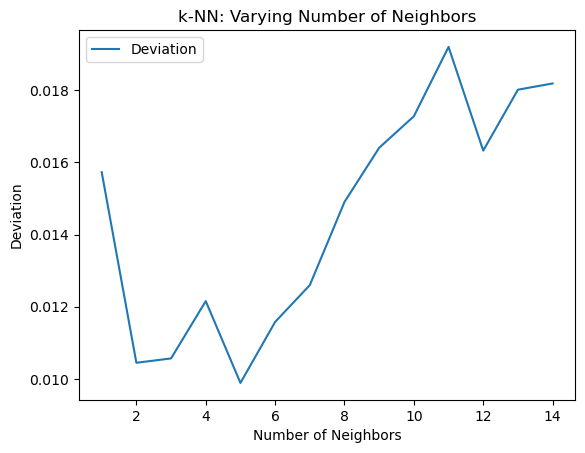

In [31]:
plt.title('k-NN: Varying Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Deviation')
plt.plot(neighbors, deviation, label = 'Deviation')
plt.legend()
plt.show()